<a href="https://colab.research.google.com/github/qmeng222/CNN/blob/main/GPU/GPU_implement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activate GPU:

To run models on a GPU :
-> Runtime -> Change runtime type -> Hardware accelerator -> GPU

In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

In [26]:
# use GPU:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


👆 Now I have a GPU available to use.

# Create model and data on CPU:

In [27]:
# build a simple model:
net = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)

In [28]:
# make some data on CPU:
data   = torch.randn((1000,20)) # samples x features
labels = torch.randint(low=0,high=2,size=(1,1000)) # creates a torch tensor with a shape of (1,1000) filled with randomly generated integers in the range of [0,2)

print(type(data))
print(data.shape)

print(type(labels))
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([1000, 20])
<class 'torch.Tensor'>
torch.Size([1, 1000])


# Send model and data from CPU to GPU:

In [29]:
# send the model and data to GPU (CPU -> GPU):

# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [30]:
print(data.shape)
print(data)

torch.Size([1000, 20])
tensor([[ 1.8209, -0.0462,  0.1738,  ..., -0.3826,  0.6492,  0.5086],
        [ 1.4367,  1.0612,  0.4366,  ..., -0.5157,  0.6424,  0.1084],
        [-0.9657,  0.4175, -0.8159,  ..., -1.2762,  0.0296, -0.1135],
        ...,
        [ 1.1620, -0.0646,  1.4039,  ...,  0.5671, -1.4450, -0.2399],
        [ 2.3070,  0.6808, -0.3905,  ...,  0.4983, -1.1927,  1.0203],
        [ 0.8552,  0.7828, -0.9215,  ..., -1.0548, -0.8057,  1.6183]],
       device='cuda:0')


# Create data directly on GPU:

In [31]:
# or create data directly on the GPU:
dataG = torch.randn((1000,20),device=device) # print(device) -> 'cuda:0'
dataC = torch.randn((1000,20),device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model:

In [32]:
output = net(data)
output.device

device(type='cuda', index=0)

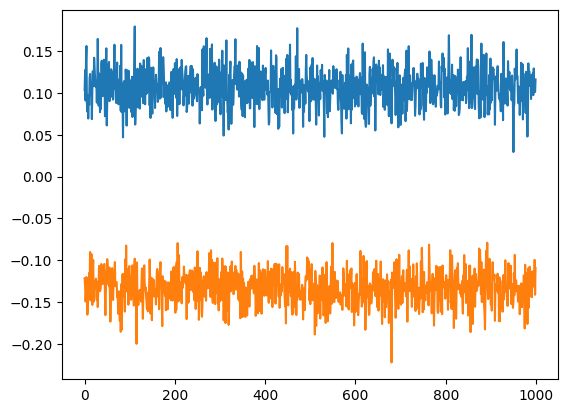

In [33]:
# plot the results:
plt.plot(output.detach().cpu());

# Calculate computation time:

In [35]:
# 1. when device ='gpu':

# start the clock (CPU):
starttime = time.process_time()

# move & run (GPU):
device = 'cuda:0'
net = net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu() # get output back to CPU!

# stop the clock (CPU):
GPUtime = 1000*(time.process_time() - starttime)

In [36]:
# 2. when device ='cpu':

# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [37]:
# time in ms
[CPUtime,GPUtime]

[7.966088999999954, 2.948655000000855]

In [38]:
device

'cpu'

In [39]:
# 3. everything stays on CPU:

# recreate network and data
net  = nn.Sequential(
    nn.Linear(20,100),
    nn.ReLU(),
    nn.Linear(100,500),
    nn.ReLU(),
    nn.Linear(500,30),
    nn.ReLU(),
    nn.Linear(30,2)
)
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2,CPUtime,GPUtime]

[7.095230000000896, 7.966088999999954, 2.948655000000855]